In [1]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline
from specpol.plot import plot_ritz

In [9]:
def plot(ritz_results: Dict[int, np.array], dbm=None):
    # plot the approximation with some added bars and lines

    fig, ax1, ax2 = plot_ritz(ritz_results, dbm=dbm)

    ax1.set_ylim(-0.5, 2.5)
    ax1.axhline(0.335936534279424, linestyle="--", alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle="--", alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle="--", alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle="--", alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle="--", alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle="--", alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle="--", alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    ax2.set_xlim(-3, 1.5)
    ax2.set_ylim(-0.5, 1.25)

    ax2.axvline(0.335936534279424, linestyle="--", alpha=0.6)
    ax2.axvline(0.536620364148446, linestyle="--", alpha=0.6)
    ax2.axvline(0.580834838005921, linestyle="--", alpha=0.6)
    ax2.axvline(0.591500609480355, linestyle="--", alpha=0.6)

    ax2.axvline(0.949634991713441, linestyle="--", alpha=0.6)
    ax2.axvline(1.24466406161563, linestyle="--", alpha=0.6)
    ax2.axvline(1.29192807845892, linestyle="--", alpha=0.6)

    ax2.axvspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax2.axvspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax2.axvspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    plt.show()

In [6]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    return -40*np.exp(-x)

In [15]:
rusl_dbm = {}
vc = {}
for i in tqdm(range(50, 275, 50)):
    rusl_dbm[i] = sturm_liouville_halfline(potential, i, 250, alpha=np.pi/8)#, dbm=(lambda x: x<=150))

  0%|          | 0/5 [00:00<?, ?it/s]/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:96: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")
100%|██████████| 5/5 [02:35<00:00, 31.08s/it]


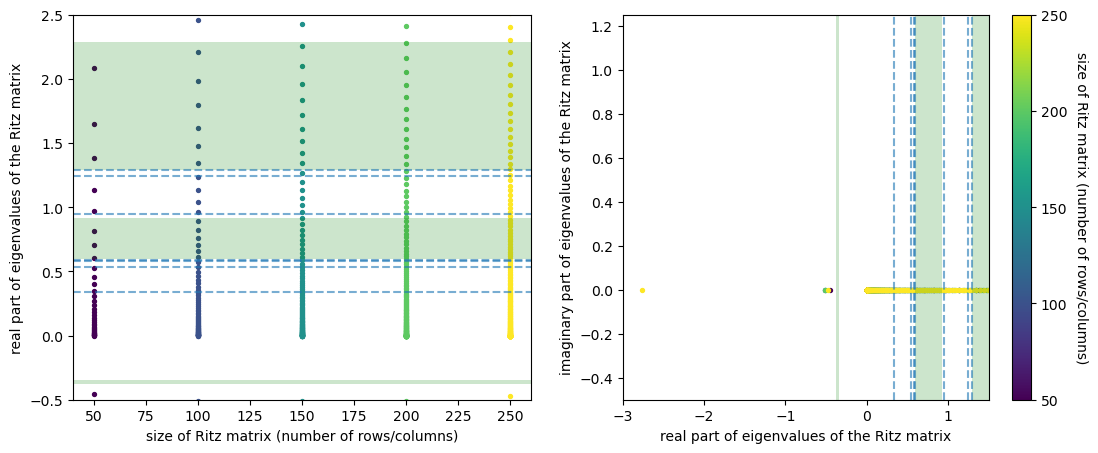

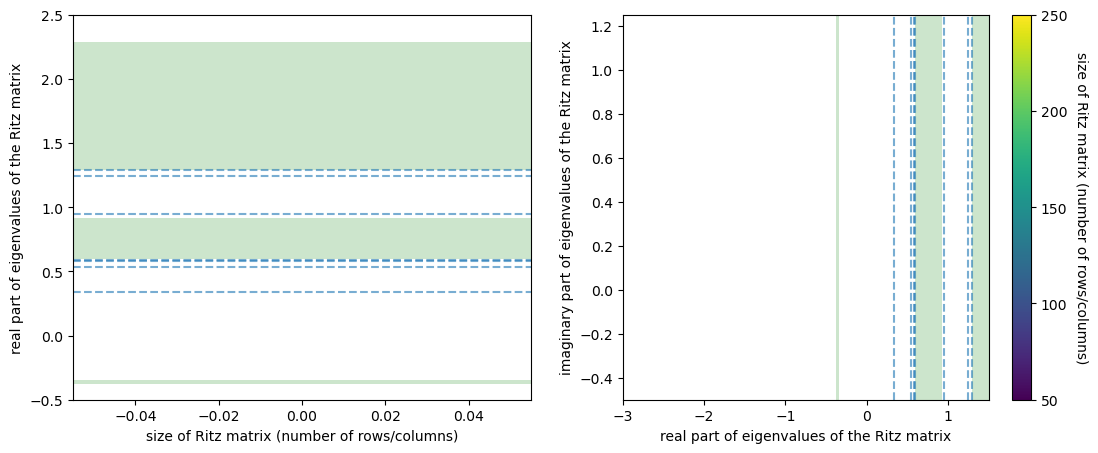

In [16]:
plot(rusl_dbm)
#plot(rusl_dbm, dbm=0.95)

In [17]:
vecs_vals = sturm_liouville_halfline(potential, 250, 250, alpha=np.pi/8, returns='vectors')#, dbm=(lambda x: x<=150))

/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:96: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")


In [18]:
gap = vecs_vals.filter(lambda x: x == min(list(vecs_vals.data.keys())))# and x.imag > 0.95)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


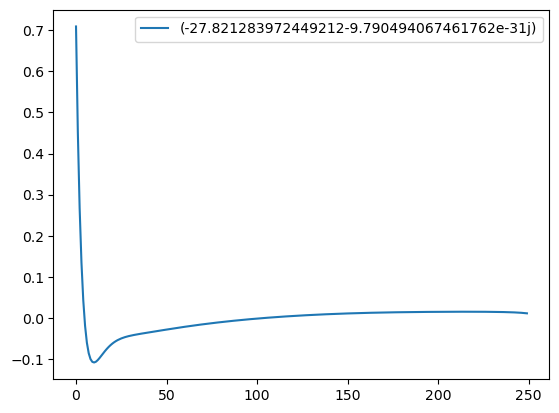

In [19]:
for val, vec in gap.items():
    plt.plot(vec, label=f'{val}')
    plt.legend()
    plt.show()

In [113]:
from scipy.special import jn_zeros
from scipy.optimize import newton
import mpmath as mp
import numpy as np
def lagquad2(n: int) -> float:
    """Calculate the sample points and weights for Gauss-Laguerre quadrature.

    Parameters
    ----------
    n: int
        The number of sample points to use.

    Returns
    -------
    float
        The result of the integral.
    """
    def objective(x):
        return float(mp.laguerre(n, 0, x))

    # the zeroes of the Laguerre polynomial can be approximated by the zeroes
    # of the Bessel function
    # (see e.g Abramowitz and Stegun §22.16)
    bessel_zeroes =  np.concatenate((np.zeros(1), jn_zeros(0, n)))
    def approx_root(m):
        """Approximate the m'th zero of L_n."""
        return (bessel_zeroes[m]**2 / (4*(n+1/2))) * (1 + (-2 + bessel_zeroes[m]**2)/(48*(n+1/2)**2))

    roots = []
    # one round of Newton's method
    for m in range(1, n):
        x0 = approx_root(m)
        roots.append(newton(objective, x0, maxiter=n**2))
    weights = [float(x / ((n + 1) * mp.laguerre(n + 1, 0, x)) ** 2) for x in roots]

    return roots, weights


In [115]:
from specpol.common import laguerre

roots, weights = lagquad2(150)
sum(laguerre(5, 0, x)*laguerre(5, 0, x)*w for x, w in zip(roots, weights))

1.0000000000069285

In [16]:
from specpol.common import lagquad
lagquad(250)

/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:97: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")


([0.07473934037887389,
  0.13876907295235785,
  0.2225036511157322,
  0.32594665720012084,
  0.44910225803354004,
  0.5919753411060437,
  0.7545715515715302,
  0.9368973054228925,
  1.138959795532117,
  1.3607669952431416,
  1.602327661075235,
  1.8636513351279145,
  2.144748347431736,
  2.4456298183594978,
  2.7663076611461257,
  3.1067945845563836,
  3.467104095705888,
  3.8472505030513986,
  4.247248919554588,
  4.667115266024097,
  5.106866274639403,
  5.566519492659478,
  6.046093286318947,
  6.54560684491431,
  7.0650801850827625,
  7.604534155276141,
  8.163990440432608,
  8.743471566848712,
  9.343000907254613,
  9.962602686095291,
  10.602301985020746,
  11.262124748588246,
  11.94209779017985,
  12.642248798138565,
  13.36260634212656,
  14.103199879709127,
  14.864059763168102,
  15.645217246548656,
  16.446704492943553,
  17.26855458201906,
  18.11080151778692,
  18.97348023662692,
  19.856626615564803,
  20.76027748081039,
  21.68447061656106,
  22.629244774075783,
  23.59